# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Data Mining Goals:**
- Develop a predictive model to determine which used vehicles by make, model, year, region, and condition sell for the highest sale price.
- Identify the key factors that contribute to the used vehicle's sale price.
- Quantify the impact that `year` and `mileage` have on the `price` of a vehicle.

**Data Mining Success Criteria:**
- The model achieves an accuracy of at least 90%

**Data Mining Task:**
**Objective**: Analyze historical sales data and car features (e.g., mileage, make, model, year, condition, location) to identify the factors and their respective influence on the final sale price of used cars.

**Inputs:**
- `year`
- `manufacturer`
- `model`
- `odometer`
- `condition`

**Output:**
- The predicted `price`, in dollars, of the vehicle

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First, I would want to view what the columns of the data are, by utilizing the `.info()` method on the loaded DataFrame. I would also want to drop the rows that have null values for key factors of my data, such as `manufacturer`, `model`, `year`, `odometer` and `condition`. I would also want to filter out rows where the price is 0 or is a very large number, as these are not accurate values and will skew my model. I can drop the column `vin` because that will not be used at all in my research.

In [1]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


data = pd.read_csv("data/vehicles.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
data.head(25)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
# Vehicles with a price greater than $500,000
high_price_values = data[data["price"] >= 500000]["price"]
high_price_values.value_counts()

price
1234567       13
1000000        7
123456789      6
12345678       6
1111111        5
987654321      2
3024942282     2
3736928711     2
777777         2
1111111111     2
990000         1
655000         1
2000000        1
3009548743     1
99999999       1
566567         1
17000000       1
516999         1
6995495        1
135008900      1
1234567890     1
1410065407     1
554900         1
1666666        1
5000000        1
113456789      1
10004000       1
3226714        1
11111111       1
25003000       1
999999         1
Name: count, dtype: int64

In [5]:
# Vehicles with a price of 0 or less
zero_price_values = data[data["price"] <= 0]["price"]
zero_price_values.value_counts()

price
0    32895
Name: count, dtype: int64

In [6]:
model_columns = ["year", "manufacturer", "model", "odometer", "price", "condition"]
null_values = data[data[model_columns].isnull().any(axis=1)]
null_values

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,7302100739,wyoming,7477,2012.0,fiat,500,NaN,NaN,gas,64267.0,clean,manual,3C3CFFBRXCT171831,NaN,NaN,hatchback,NaN,wy
426856,7302099628,wyoming,5477,2003.0,nissan,murano,NaN,NaN,gas,168055.0,clean,automatic,JN8AZ08W03W203477,NaN,NaN,SUV,blue,wy
426862,7301950980,wyoming,27590,2018.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,36138.0,clean,other,KMHGN4JE4JU248193,NaN,NaN,sedan,black,wy
426863,7301949724,wyoming,25590,2017.0,NaN,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,clean,automatic,KMHGN4JE2HU183838,rwd,NaN,sedan,white,wy



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
# Clean it up
data1 = copy.deepcopy(data)
data1.drop(null_values.index, inplace=True)

In [8]:
old_year_values = data1[data1["year"] < 2000]["year"]
data1.drop(old_year_values.index, inplace=True)

In [9]:
high_mileage_values = data1[data1["odometer"] > 150000]["odometer"]
data1.drop(high_mileage_values.index, inplace=True)

In [10]:
zero_price_values = data1[data1["price"] <= 5000]["price"]
data1.drop(zero_price_values.index, inplace=True)
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [11]:
high_price_values = data1[data1["price"] >= 58000]["price"]
data1.drop(high_price_values.index, inplace=True)

In [12]:
data1.drop(columns=["VIN", "id"], inplace=True)

In [13]:
data1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


In [14]:
features = data1[["year", "odometer", "condition"]]
target = data1["price"]
features = pd.get_dummies(features, drop_first=True)

In [15]:
def boxplot_outliers(data: pd.DataFrame):
    """This function creates boxplots to check for outliers in our data

    Parameters
        data (pandas.DataFrame):
            The dataframe to check outliers for.

    Returns
        None
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(15, 10))
    for i in range(0, len(num_vars)):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)

    plt.show()
    sns.reset_defaults()

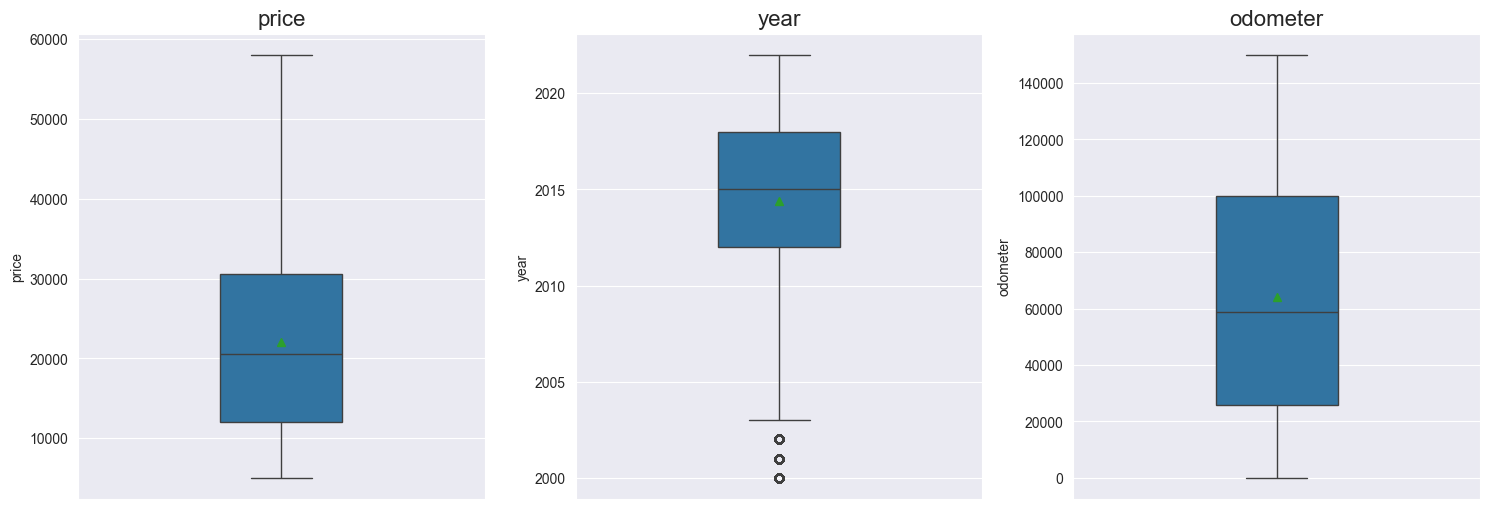

In [16]:
boxplot_outliers(data1)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [18]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3323.497022346401
R-squared: 0.7009725082826432


Based on our RandomForestRegressor model's MAE and R-Squared, it is a decent predictor of the price of a car based on `year`, `odometer`, and `condition`. Our price prediction is off by $3,323,50 on average, with an R^2 of 70%. We are clearly not accounting for some certain features that impact price. Obviously, we can assume this is at least partially because we are omitting the categorical variables `make` and `manufacturer`. Let's add `manufacturer` back into the features and see how that affects our data.

In [19]:
features = data1[["year", "odometer", "condition", "manufacturer"]]
target = data1["price"]
features = pd.get_dummies(features, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2500.6818514558504
R-squared: 0.8046267628862946


Just adding the manufacturer back to the data improved our predictions! There's a problem if we try to add the `model` feature into this model...it has extremely high cardinality. As you can see below, there are 11,021 models which when combined with `pd.get_dummies` we create far too many columns for my machine to build a model from. We need to figure out a way to account for this feature without the cardinality.

In [22]:
data1["model"].value_counts()

model
f-150                         1755
silverado 1500                1545
1500                           963
wrangler                       871
altima                         776
                              ... 
silverado custom 4x4             1
f-150 fx4 sport appearance       1
f-150 sport                      1
prius prime advantage            1
tradesman 1500                   1
Name: count, Length: 11021, dtype: int64

We can use target encoding to encode the model with the average price for that model. That way the model is represented as a numeric value associated with the target variable, `price`, that our model can process.

In [28]:
model_target_mean = data1.groupby('model')['price'].mean()
data1['model_encoded'] = data1['model'].map(model_target_mean)
data1.drop(columns=['model'], inplace=True)

In [30]:
features = data1[["year", "odometer", "condition", "model_encoded"]]
target = data1["price"]
features = pd.get_dummies(features, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [32]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1352.0357918041154
R-squared: 0.9354189351127576


As you can see, by doing this, we greatly improve our model! Our MAE drops to $1,352.04 and our R^2 goes up to 94%. This is by far our best model.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.